# Multi-Armed Bandit Line Jump

In this notebook, we test our knowledge of multi-armed bandits on the a line wark problem. The formulation of a line walk problem is as follows:
- We have a line scaled from 0 to $\texttt{max\_scale}$.
- We set sample random two variables $\texttt{agent\_position}$ and $\texttt{goal}$ in the line scale. These are:
    - $\texttt{agent\_position}$: our agent position
    - $\texttt{goal}$: our goal position
- We can perfom a jump from a set of n jumps which basically determines how the agent towards to the goal.
- Objective: Find the jump to makes the agent reach the goal.

### Import

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Environment

We start by creating the environment which is a fairly simple one.
- We generate the goal and the agent position
- Our reward at a given time step is given by:

$$ R_t = \frac{1}{|\texttt{agent\_positon}_t - \texttt{goal}| + 1} $$

In [60]:
class LineWalkEnvironment:
    def __init__(self, max_scale) -> None:
        self.max_scale = max_scale
        self.goal = np.random.randint(0, self.max_scale)
        self.agent_position = self.get_new_agent_position(self.max_scale, self.goal)
        
    def get_new_agent_position(self, max_scale, goal):
        # sample the position of the agent while 
        # excluding the goal position
        tmp = list(range(max_scale))
        tmp.remove(goal)
        return np.random.choice(tmp)
        
    def jump(self, step):
        agent_position = self.agent_position + step
        return 1 / (np.abs(self.goal - agent_position) + 1)
        

## Agent

- The only information our greedy agent has is:
    - The set of actions it can perform.
    - The expected gain of each action along over time.
- We update our reward system according to the followinf formula.

$$
Q_t(a)=\frac{R_1+R_2+\cdots+R_{N_t(a)}}{N_t(a)}
$$

In [97]:
class Jumper:
    def __init__(self, allowed_jumps, epsilon = 0) -> None:
        assert 0 <= epsilon <= 1.0
        self.epsilon = epsilon
        self.allowed_jumps = allowed_jumps
        assert isinstance(allowed_jumps, list) and len(allowed_jumps) > 1
        self.expected_reward = [[0] for _ in range(len(self.allowed_jumps))]
        
    def jump(self, environment):
        if np.random.uniform() > self.epsilon:
            step_idx = np.argmax([np.mean(rewards) for rewards in self.expected_reward])
        else:
            step_idx = np.random.choice(range(len(self.allowed_jumps)))
            
        reward = environment.jump(self.allowed_jumps[step_idx]) + np.random.normal(0, 1)
        
        # update the cumulative reward of our agent
        self.expected_reward[step_idx].append(reward)
        
        return np.mean(self.expected_reward[step_idx])
        
    def reset(self):
        self.expected_reward = [[0] for _ in range(len(self.allowed_jumps))]

## Training

Let us train our agent to find the best direction to walk through the path towards the goal.

In [101]:
env = LineWalkEnvironment(256)

# create available 10 jumps such that 
# there exists only few possible jumps 
actions = np.random.randint(-256, 256, 9)
actions = set(actions).union({env.goal - env.agent_position})

print(f"agent position: {env.agent_position}")
print(f"goal position: {env.goal}")

agent position: 16
goal position: 239


### Greed Solution  (select best action)

We will use the approach to select the action at that time step

Text(510.4494949494949, 0.5, 'Expected Reward')

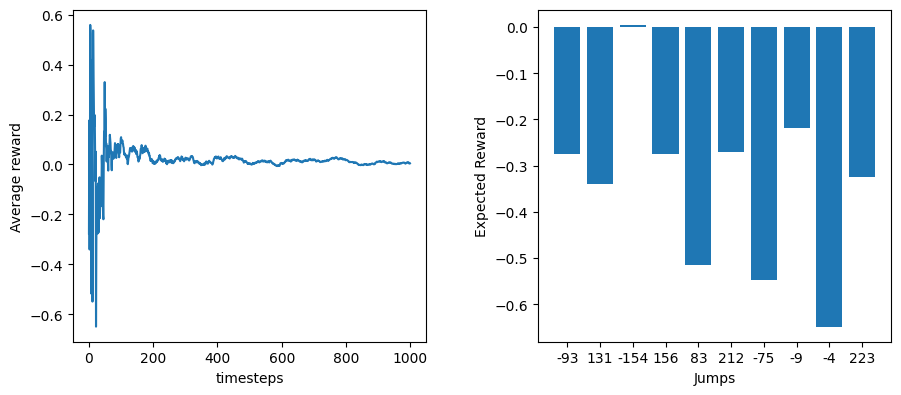

In [109]:
greedy_agent = Jumper(list(actions), epsilon=0.0)

reward = []

timesteps = 1000
for _ in range(timesteps):
    reward.append(greedy_agent.jump(env))
    
fig, ax = plt.subplots(1, 2, figsize = (10, 5))

plt.tight_layout(pad=5.0)

ax[0].plot(range(len(reward)), reward)
ax[0].set_xlabel('timesteps')
ax[0].set_ylabel('Average reward')

ax[1].bar([str(jump) for jump in greedy_agent.allowed_jumps], [np.mean(rewards) for rewards in greedy_agent.expected_reward])
ax[1].set_xlabel('Jumps')
ax[1].set_ylabel('Expected Reward')

In [110]:
print(f"Regret: {timesteps - sum(reward)}")

Regret: 983.1038487887421


### $\epsilon$-Greed Solution  (select best action)

We will use the approach to select the action at that time step

Text(510.4494949494949, 0.5, 'Expected Reward ($\\epsilon = 0.1$)')

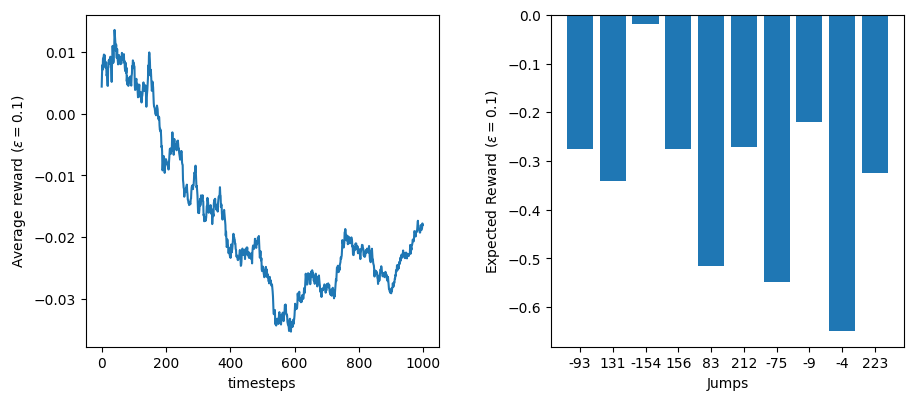

In [111]:
epsilon = 0.1
e_greedy_agent = Jumper(list(actions), epsilon=epsilon)

reward = []

timesteps = 1000
for _ in range(timesteps):
    reward.append(greedy_agent.jump(env))
    
fig, ax = plt.subplots(1, 2, figsize = (10, 5))

plt.tight_layout(pad=5.0)

ax[0].plot(range(len(reward)), reward)
ax[0].set_xlabel('timesteps')
ax[0].set_ylabel(f'Average reward ($\epsilon = {epsilon}$)')

ax[1].bar([str(jump) for jump in greedy_agent.allowed_jumps], [np.mean(rewards) for rewards in greedy_agent.expected_reward])
ax[1].set_xlabel('Jumps')
ax[1].set_ylabel(f'Expected Reward ($\epsilon = {epsilon}$)')

In [112]:
print(f"Regret: {timesteps - sum(reward)}")

Regret: 1016.7873636469141


### Notes

This envorinoment does not seem to be the best to demonstrate multi-armed bandit. Should update asap.